# Location of Field Research Facility and Bathymetry DEM during DUNEX
written by: EJ Rainville

Leads to fig01 in the paper

In [6]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib widget

## Create map of North Carolina and Show Bathymetry DEM during DUNEX

206.0


Text(0, 0.5, 'Elevation (relative to NAVD 88) [m]')

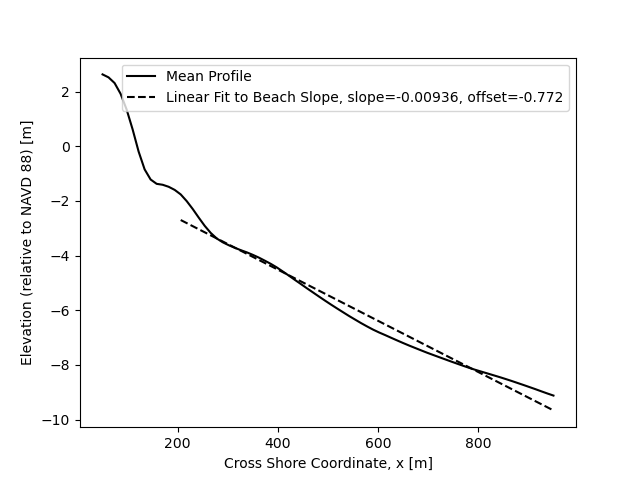

In [16]:
bathy_file = '../data/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
x_values = bathy_dataset['xFRF'][:]
bathy_profile = np.nanmean(bathy, axis=0)

# Compute an average slope just past the sandbar at approximately 200 m in x
def linear_function(x, slope, offset):
    return slope*x + offset

print(x_values[13])

# Fit the curve past x = 200 at index 13 
index = 13
initial_guess = [(-8 + 2)/(800 - 200), 0.1]
popt, _ = curve_fit(linear_function, x_values[index:], bathy_profile[index:], p0=initial_guess, nan_policy='omit')
fit_slope, fit_offset = popt
linear_fit = linear_function(x_values[index:], fit_slope, fit_offset)

# Plot the profile and the linear fit
fig, ax = plt.subplots()
ax.plot(x_values, bathy_profile, color='k', label='Mean Profile')
ax.plot(x_values[index:], linear_fit, color='k', linestyle='dashed', label=f'Linear Fit to Beach Slope, slope={np.round(fit_slope, 5)}, offset={np.round(fit_offset, 3)}')
ax.legend()
ax.set_xlabel('Cross Shore Coordinate, x [m]')
ax.set_ylabel('Elevation (relative to NAVD 88) [m]')